Step 1: Run in the terminal "pip install kaggle"  
Step 2: Activate kaggle API token in Account tab  
Step 3: Get kaggle.json file -> save to C:/Users/jtrum/.kaggle  
Step 4: Run in the terminal "kaggle datasets download -d kmader/satellite-images-of-hurricane-damage  
Step 5: Run code chunk below -> specify pathway where it says ("~/datasets/")  

In [8]:
import os
import zipfile

with zipfile.ZipFile("satellite-images-of-hurricane-damage.zip", "r") as zip_ref:
    zip_ref.extractall(os.path.expanduser("C:/Users/jtrum/pennmusa/MUSA6500/finalData"))

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import keras as keras
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, UpSampling2D, Concatenate
from tensorflow.keras.models import Model

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold


Training data (5000 of each class)

In [2]:
#Since the channels are 3, we can use keras to import into a dataset.
train_path = 'C:/Users/jtrum/pennmusa/MUSA6500/finalData/train_another'

#Use Keras to import data
train_dataset = keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="int",
    class_names= ['no_damage', 'damage'],
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

#Convert keras dataset to numpy array
train_dataset = train_dataset.unbatch()
train_X = np.asarray(list(train_dataset.map(lambda x, y: x)))
train_y = np.asarray(list(train_dataset.map(lambda x, y: y)))

Found 10000 files belonging to 2 classes.
Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Validation data (1000 of each class)

In [3]:
#Since the channels are 3, we can use keras to import into a dataset.
val_path = 'C:/Users/jtrum/pennmusa/MUSA6500/finalData/validation_another'

#Use Keras to import data
val_dataset = keras.utils.image_dataset_from_directory(
    val_path,
    labels="inferred",
    label_mode="int",
    class_names= ['no_damage', 'damage'],
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

#Convert keras dataset to numpy array
val_dataset = val_dataset.unbatch()
val_X = np.asarray(list(val_dataset.map(lambda x, y: x)))
val_y = np.asarray(list(val_dataset.map(lambda x, y: y)))

Found 2000 files belonging to 2 classes.


Test dataset (1000 of each class)

In [4]:
#Since the channels are 3, we can use keras to import into a dataset.
test_path = 'C:/Users/jtrum/pennmusa/MUSA6500/finalData/test'

#Use Keras to import data
test_dataset = keras.utils.image_dataset_from_directory(
    test_path,
    labels="inferred",
    label_mode="int",
    class_names= ['no_damage', 'damage'],
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

#Convert keras dataset to numpy array
test_dataset = test_dataset.unbatch()
test_X = np.asarray(list(test_dataset.map(lambda x, y: x)))
test_y = np.asarray(list(test_dataset.map(lambda x, y: y)))

Found 2000 files belonging to 2 classes.


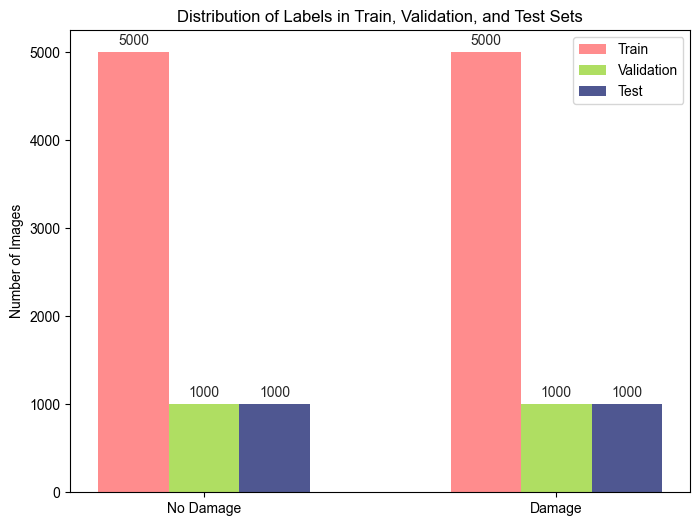

In [13]:
import matplotlib.pyplot as plt

# Define the labels
labels = ['No Damage', 'Damage']

# Count the number of labels in each array
train_counts = [sum(train_y==0), sum(train_y==1)]
val_counts = [sum(val_y==0), sum(val_y==1)]
test_counts = [sum(test_y==0), sum(test_y==1)]

# Create a barplot
fig, ax = plt.subplots(figsize=(8,6))
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

rects1 = ax.bar(x - width, train_counts, width, label='Train', color='#FF8C8DFF')
rects2 = ax.bar(x, val_counts, width, label='Validation', color='#AFDE62FF')
rects3 = ax.bar(x + width, test_counts, width, label='Test', color='#4F5791FF')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Images')
ax.set_title('Distribution of Labels in Train, Validation, and Test Sets')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
sns.set_style("ticks")

# Add counts above the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()


Resnet

In [5]:
img_width = 128
img_height = 128
num_channels = 3
num_classes = 2
input_shape = 128, 128, 3

In [6]:
# Shapes of each label
from keras.utils import to_categorical
tr_y = to_categorical(train_y, num_classes=2)
v_y = to_categorical(val_y, num_classes=2)
te_y = to_categorical(test_y, num_classes=2)
print("Shape of train images is: ", train_X.shape)
print("Shape of validation images is: ", val_X.shape)
print("Shape of test images is: ", test_X.shape)
print("Shape of train labels is: ", tr_y.shape)
print("Shape of validation labels is: ", v_y.shape)
print("Shape of test labels is: ", te_y.shape)

Shape of train images is:  (10000, 128, 128, 3)
Shape of validation images is:  (2000, 128, 128, 3)
Shape of test images is:  (2000, 128, 128, 3)
Shape of train labels is:  (10000, 2)
Shape of validation labels is:  (2000, 2)
Shape of test labels is:  (2000, 2)


In [60]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization, ReLU, Add, Flatten, Dense
from tensorflow.keras.models import Model

def resnet_block(input_data, filters, strides=1):
    x = Conv2D(filters, kernel_size=3, strides=strides, padding="same")(input_data)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(filters, kernel_size=3, strides=1, padding="same")(x)
    x = BatchNormalization()(x)

    shortcut = input_data
    if strides > 1:
        shortcut = Conv2D(filters, kernel_size=1, strides=strides, padding="same")(shortcut)
        shortcut = BatchNormalization()(shortcut)

    x = Add()([x, shortcut])
    x = ReLU()(x)
    return x

def build_resnet(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, kernel_size=7, strides=2, padding="same")(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPooling2D(pool_size=3, strides=2, padding="same")(x)

    x = resnet_block(x, 64)
    x = resnet_block(x, 64)
    x = resnet_block(x, 64)

    x = resnet_block(x, 128, strides=2)
    x = resnet_block(x, 128)
    x = resnet_block(x, 128)

    x = resnet_block(x, 256, strides=2)
    x = resnet_block(x, 256)
    x = resnet_block(x, 256)

    x = resnet_block(x, 512, strides=2)
    x = resnet_block(x, 512)
    x = resnet_block(x, 512)

    x = Flatten()(x)
    outputs = Dense(num_classes, activation="softmax")(x)

    model = Model(inputs, outputs)
    return model

model = build_resnet(input_shape=(128, 128, 3), num_classes=num_classes)

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(train_X, tr_y, batch_size=32, epochs=10, validation_data=(val_X, v_y))

In [61]:
model = build_resnet(input_shape=(128, 128, 3), num_classes=num_classes)


In [62]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(train_X, tr_y, batch_size=32, epochs=10, validation_data=(val_X, v_y))


Epoch 1/10
313/313 [==============================] - 1109s 4s/step - loss: 1.2542 - accuracy: 0.6620 - val_loss: 1.7465 - val_accuracy: 0.5000
Epoch 2/10
313/313 [==============================] - 1095s 4s/step - loss: 0.4780 - accuracy: 0.8679 - val_loss: 0.6450 - val_accuracy: 0.6980
Epoch 3/10
313/313 [==============================] - 1090s 3s/step - loss: 0.4280 - accuracy: 0.8717 - val_loss: 6.6169 - val_accuracy: 0.5395
Epoch 4/10
313/313 [==============================] - 1104s 4s/step - loss: 0.2313 - accuracy: 0.9140 - val_loss: 0.4213 - val_accuracy: 0.8070
Epoch 5/10
313/313 [==============================] - 1082s 3s/step - loss: 0.2126 - accuracy: 0.9224 - val_loss: 3.2847 - val_accuracy: 0.5315
Epoch 6/10
313/313 [==============================] - 1128s 4s/step - loss: 0.1800 - accuracy: 0.9310 - val_loss: 2.7980 - val_accuracy: 0.5000
Epoch 7/10
313/313 [==============================] - 1041s 3s/step - loss: 0.3510 - accuracy: 0.8949 - val_loss: 1.3041 - val_accuracy:

In [63]:
# Apply to test data
loss, accuracy = model.evaluate(test_X, te_y)
# Print loss and accuracy scores rounded to 2 decimal places
print("Test Loss:", round(loss,2))
print("Test Accuracy:", round(accuracy,2))

63/63 [==============================] - 24s 380ms/step - loss: 5.7690 - accuracy: 0.5805
Test Loss: 5.77
Test Accuracy: 0.58


In [7]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization, ReLU, Add, Flatten, Dense
from tensorflow.keras.models import Model

def resnet_block(input_data, filters, strides=1):
    x = Conv2D(filters, kernel_size=3, strides=strides, padding="same")(input_data)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(filters, kernel_size=3, strides=1, padding="same")(x)
    x = BatchNormalization()(x)

    shortcut = input_data
    if strides > 1:
        shortcut = Conv2D(filters, kernel_size=1, strides=strides, padding="same")(shortcut)
        shortcut = BatchNormalization()(shortcut)

    x = Add()([x, shortcut])
    x = ReLU()(x)
    return x

def build_resnet(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, kernel_size=7, strides=2, padding="same")(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPooling2D(pool_size=3, strides=2, padding="same")(x)

    x = resnet_block(x, 64)
    x = resnet_block(x, 64)
    x = resnet_block(x, 64)

    x = resnet_block(x, 128, strides=2)
    x = resnet_block(x, 128)
    x = resnet_block(x, 128)

    x = resnet_block(x, 256, strides=2)
    x = resnet_block(x, 256)
    x = resnet_block(x, 256)

    x = resnet_block(x, 512, strides=2)
    x = resnet_block(x, 512)
    x = resnet_block(x, 512)

    x = Flatten()(x)
    outputs = Dense(num_classes, activation="softmax")(x)

    model = Model(inputs, outputs)
    return model

model = build_resnet(input_shape=(128, 128, 3), num_classes=num_classes)

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(train_X, tr_y, batch_size=32, epochs=10, validation_data=(val_X, v_y))

Epoch 1/10
313/313 [==============================] - 959s 3s/step - loss: 0.9346 - accuracy: 0.7936 - val_loss: 11.8790 - val_accuracy: 0.3370
Epoch 2/10
313/313 [==============================] - 1476s 5s/step - loss: 0.4750 - accuracy: 0.8688 - val_loss: 9.4280 - val_accuracy: 0.6345
Epoch 3/10
313/313 [==============================] - 851s 3s/step - loss: 0.2241 - accuracy: 0.9071 - val_loss: 0.7303 - val_accuracy: 0.7840
Epoch 4/10
313/313 [==============================] - 912s 3s/step - loss: 0.1822 - accuracy: 0.9228 - val_loss: 55.9747 - val_accuracy: 0.5360
Epoch 5/10
313/313 [==============================] - 938s 3s/step - loss: 0.1764 - accuracy: 0.9310 - val_loss: 1.0265 - val_accuracy: 0.5185
Epoch 6/10
313/313 [==============================] - 950s 3s/step - loss: 0.3285 - accuracy: 0.8915 - val_loss: 263.3831 - val_accuracy: 0.5045
Epoch 7/10
313/313 [==============================] - 1005s 3s/step - loss: 0.3766 - accuracy: 0.8801 - val_loss: 1.3641 - val_accuracy: 

In [8]:
# Apply to test data
loss, accuracy = model.evaluate(test_X, te_y)
# Print loss and accuracy scores rounded to 2 decimal places
print("Test Loss:", round(loss,2))
print("Test Accuracy:", round(accuracy,2))

63/63 [==============================] - 21s 333ms/step - loss: 0.6729 - accuracy: 0.6260
Test Loss: 0.67
Test Accuracy: 0.63


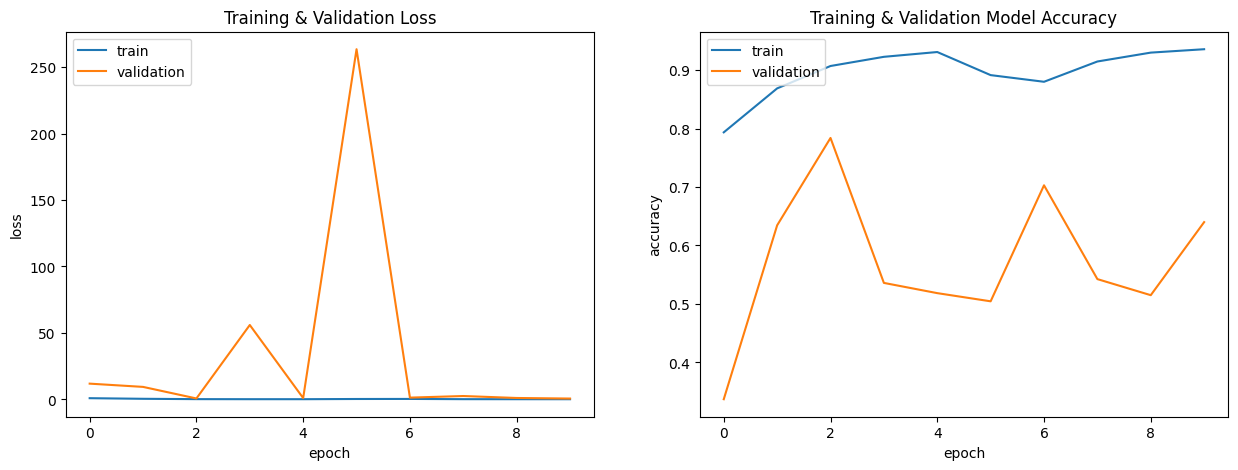

In [20]:

#Plot both loss and accuracy in subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_title('Training & Validation Loss')
ax1.set_ylabel('loss')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'validation'], loc='upper left')
ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])
ax2.set_title('Training & Validation Model Accuracy')
ax2.set_ylabel('accuracy')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'validation'], loc='upper left')
plt.show()

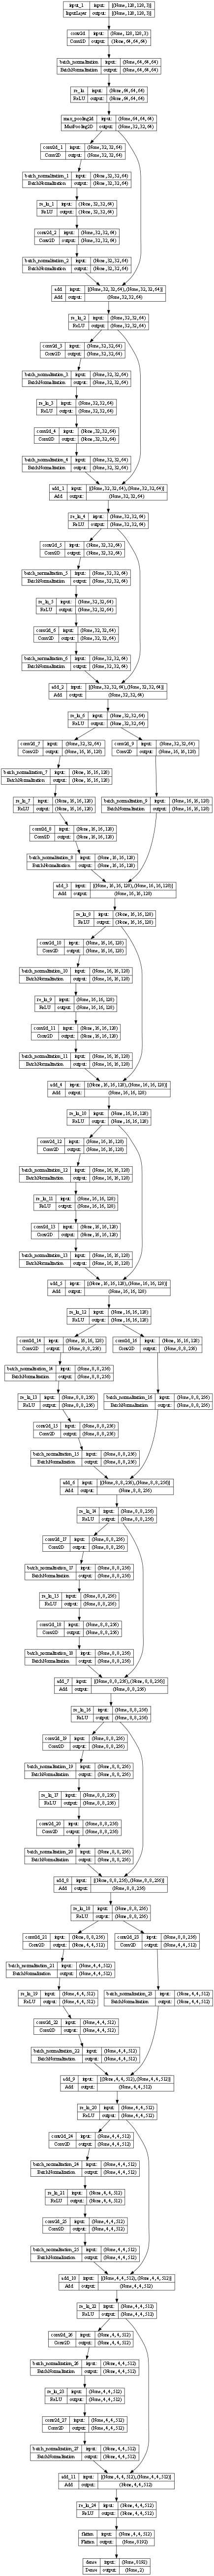

In [18]:
from keras.utils import plot_model
plot_model(model, to_file='ResNetmodel.png', show_shapes=True, rankdir='TB', dpi=50)